### Exercises

Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

Use the iris database to answer the following quesitons:

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from env import host, user, password
from pydataset import data

%config InlineBackend.figure_format = 'retina'

In [2]:
def get_db_url(db):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
def sql(tbl):
    return f'SELECT * FROM {tbl}'

In [8]:
iris = sns.load_dataset('iris')
#iris = sns.get_dataset_names()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#showdoc

In [17]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [37]:
iris.species.values.count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [15]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1. What does the distribution of petal lengths look like?

#### NOTES: 
* The majority of petal lengths are short
* count is fairly even across +/- 2, 3 to 3.5, and 6.5 to 7
* similarly even across +/- 4 and between 5 to 6.5
* The second largest peak in Count occurs between 4.5 to 5

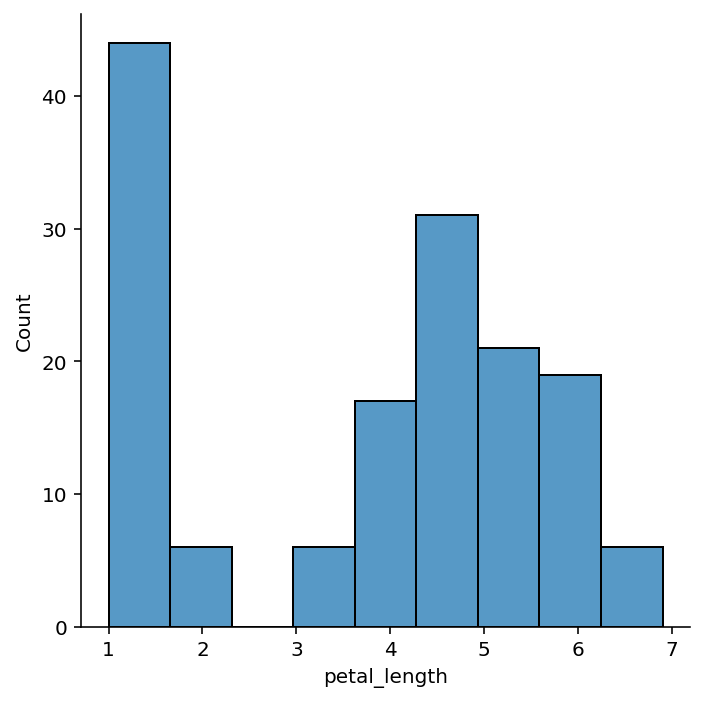

In [39]:
sns.displot(data = iris, x = 'petal_length', kde = False, rug= False)

2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

#### NOTES:

* Length and Width appear to be closely correlated

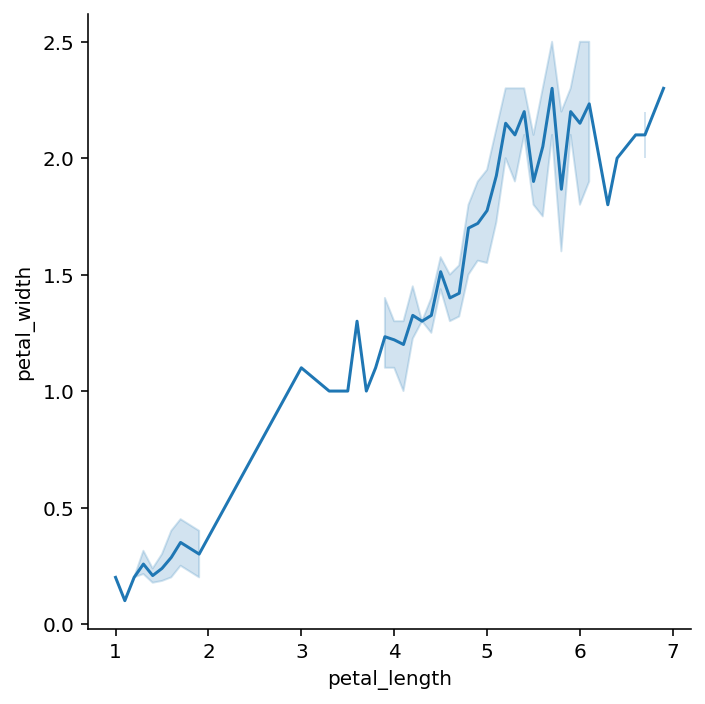

In [28]:
# plt.scatter(iris.petal_length, iris.petal_width)
# sns.relplot(data = iris, x = 'petal_length', y = 'petal_width')
# plt.scatter(iris.petal_length, iris.petal_width)
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', kind = 'line')

In [ ]:
#sns.relplot(hue = 'species'

3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

#### NOTES:

* I believe that the three species display distinct corelations in sepal length and width that are unique to their species and would allow for the prediction of species based on those attributes
    * Setosa     - Short Wide sepals
    * Versicolor - Short to Medium sepals that are Thin to Medium
    * Virginica  - Medium to Long with Medium sepals

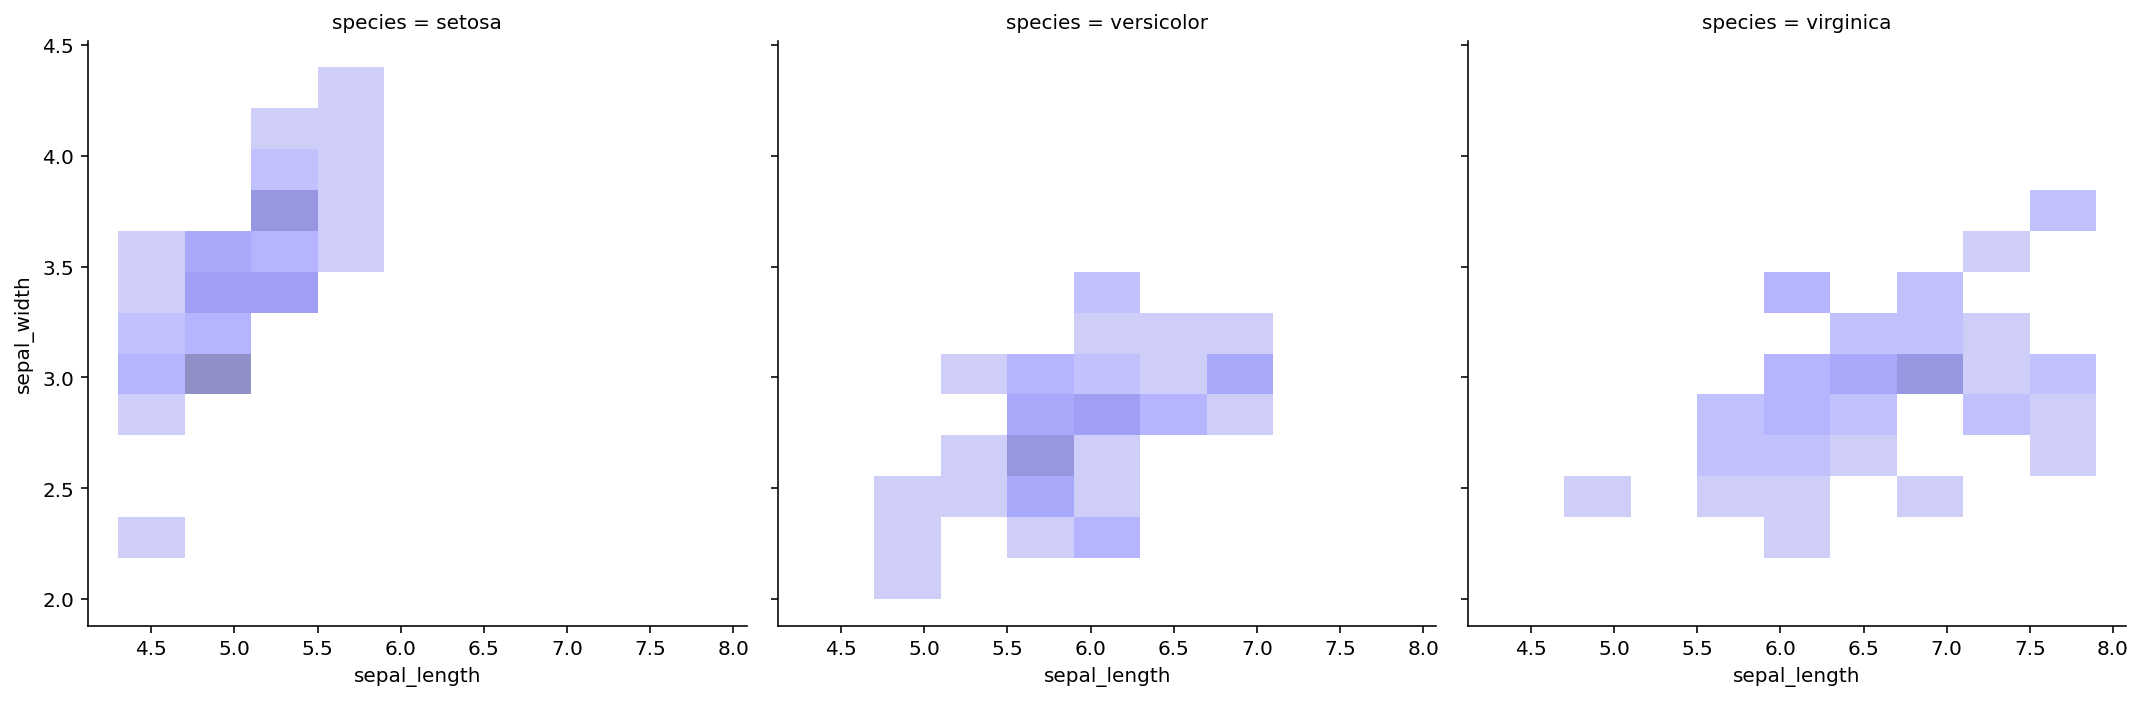

In [33]:
# sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width')
sns.displot(data = iris, x = 'sepal_length', y = 'sepal_width', col = 'species', color = 'blue', alpha = 0.6)

4. Which features would be best used to predict species?

#### NOTES:

* Petals are much better for prediction of species than Sepals

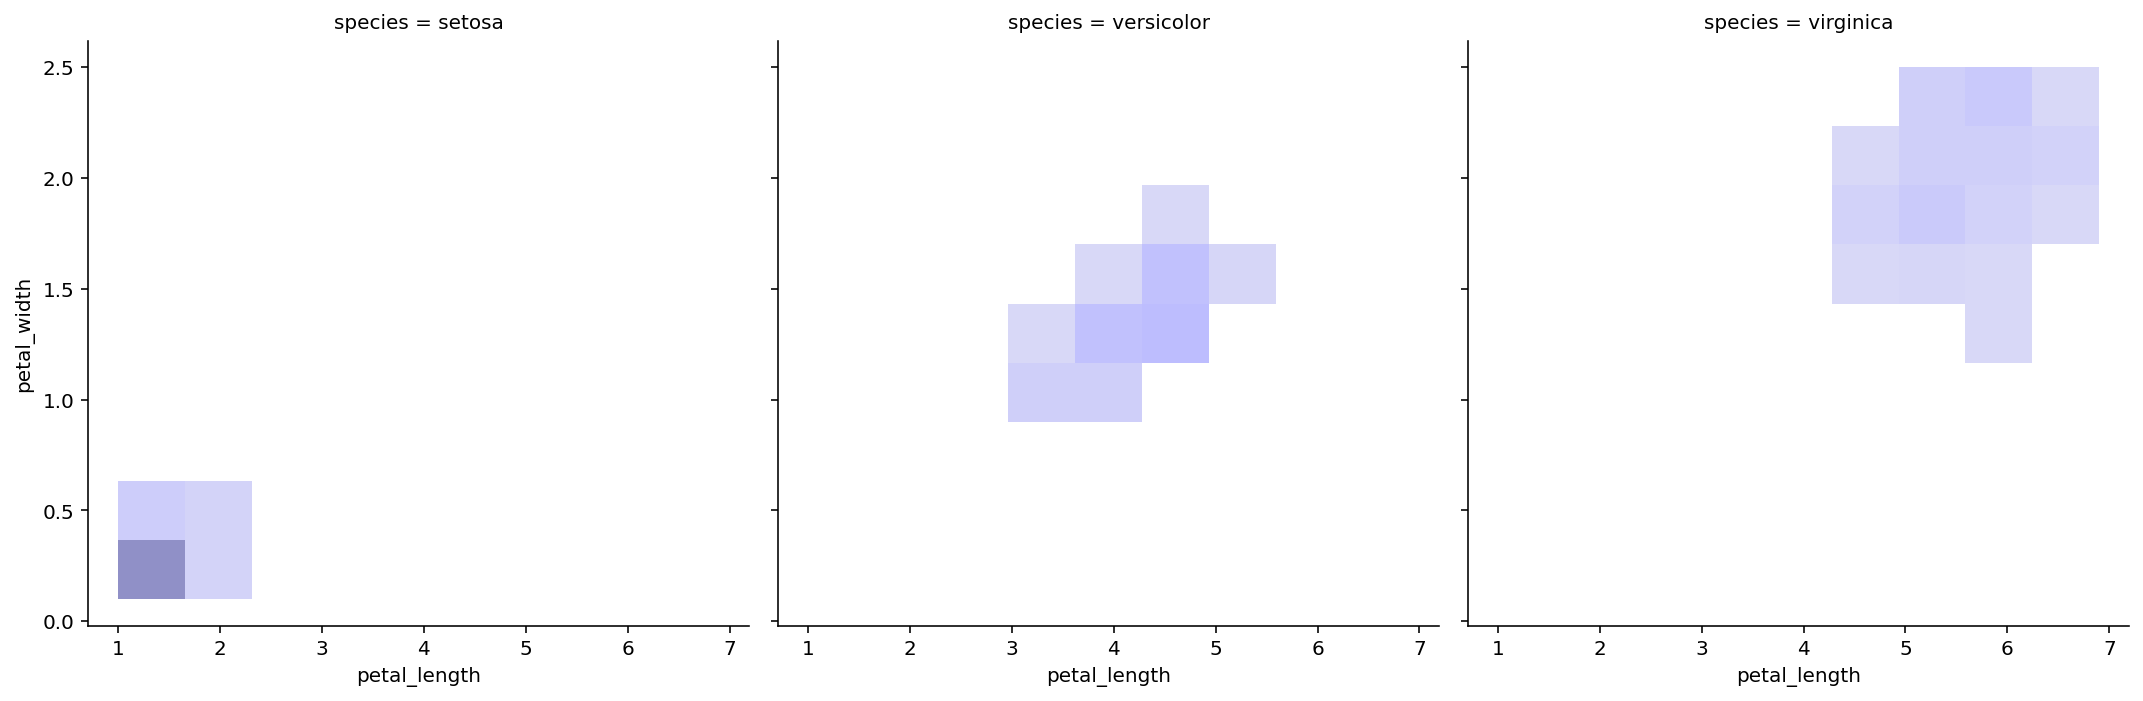

In [34]:
sns.displot(data = iris, x = 'petal_length', y = 'petal_width', col = 'species', color = 'blue', alpha = 0.6)

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

* Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
* Does whether or not a province is Catholic influence fertility?
* What measure correlates most strongly with fertility?

### BONUS

4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.